In [2]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
# Importing the dataset
Sidharth_dataset = pd.read_csv('/content/Mall_Customers.csv')
#dataset
Sidharth_dataset

ModuleNotFoundError: No module named 'numpy'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

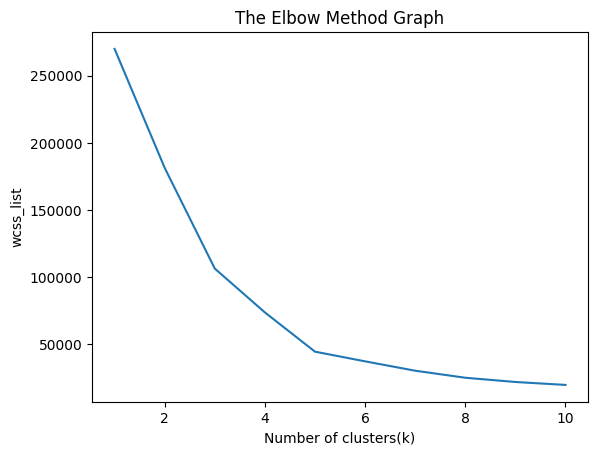

In [ ]:
x = Sidharth_dataset.iloc[:, [3, 4]].values
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= [] #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
  kmeans.fit(x)
  wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elbow Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


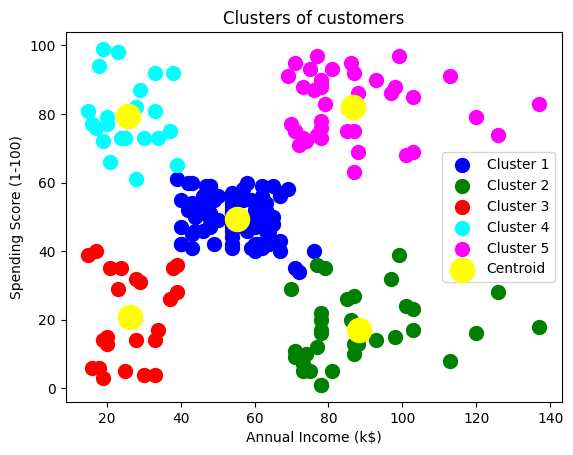

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_predict= kmeans.fit_predict(x)
#visualizing the clusters
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c ='blue', label = 'Cluster 1') #for first cluster
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c ='green', label = 'Cluster 2') #for second
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c ='red', label = 'Cluster 3') #for third cluster
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c ='cyan', label = 'Cluster 4') #for fourth cluster
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c ='magenta', label = 'Cluster 5') #for fifth cluster
mtp.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroid')
mtp.title('Clusters of customers')
mtp.xlabel('Annual Income (k$)')
mtp.ylabel('Spending Score (1-100)')
mtp.legend()
mtp.show()


In [1]:
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import pandas as pd #data processing
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn import datasets
#loding Dataset
myiris = datasets.load_iris()
x = myiris.data #we get independent variables
y = myiris.target #we get target variables
myiris


ModuleNotFoundError: No module named 'numpy'

In [ ]:
pip install scikit-learn-extra


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00


In [ ]:
#Scaling and Fitting KMedoids:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x_scaled = scaler.transform(x)
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
#to find out the cluster labels corresponding to different observations.


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
kMedoids = KMedoids(n_clusters = 3, random_state = 0)
kMedoids.fit(x_scaled)
y_kmed = kMedoids.fit_predict(x_scaled)
silhouette_avg = silhouette_score(x_scaled, y_kmed)
print(silhouette_avg)

0.4590416105554613


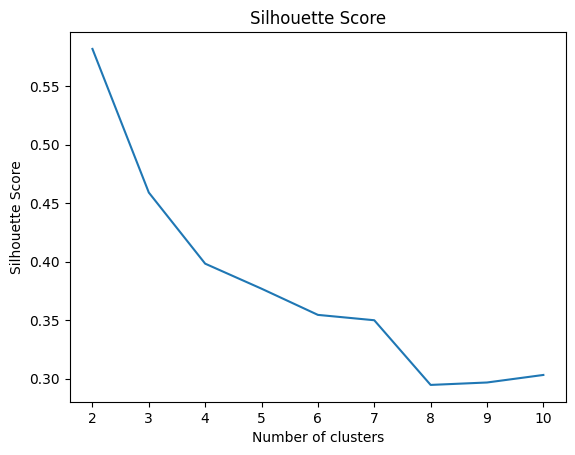

In [ ]:
sw = []
for i in range(2, 11):
    kMedoids = KMedoids(n_clusters=i, random_state=0)
    kMedoids.fit(x_scaled)
    y_kmed = kMedoids.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, y_kmed)
    sw.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(range(2, 11), sw)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [ ]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300,
n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)


0.8333333333333334

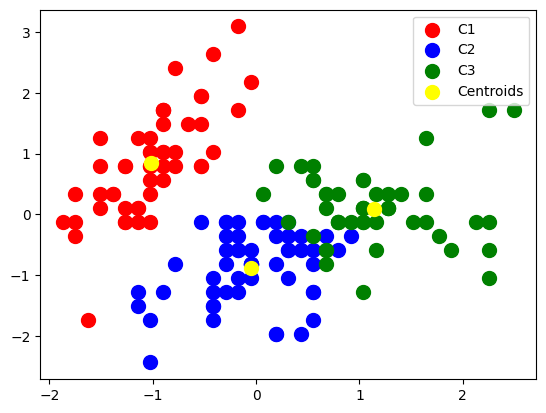

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, c='red', label='C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, c='blue', label='C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, c='green', label='C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()


In [ ]:
import numpy as np
m=np.append(x,[[10,10,10,10],[15,15,15,15],[12,12,12,12]],axis =0)
m.shape
y=np.append(y,[2,2,2])
print(y)
print("we see 3 observations are added over here.-",m.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
we see 3 observations are added over here.- (153, 4)


In [ ]:
scaler = StandardScaler().fit(m)
x_scaled = scaler.transform(m)
kmeans = KMeans(n_clusters = 3, init = 'random', max_iter = 300,
n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_scaled)
purity_score(y,y_kmeans)


0.673202614379085

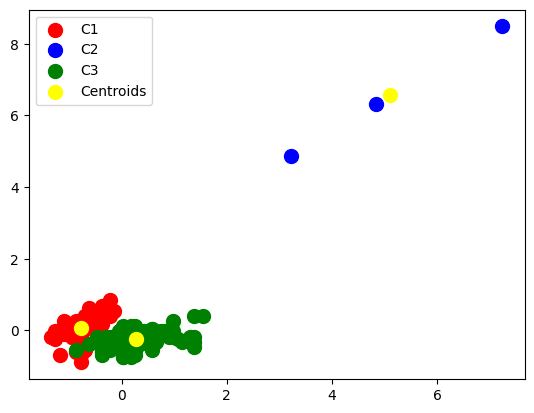

In [ ]:
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, c='red', label='C1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, c='blue', label='C2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, c='green', label='C3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.show()


<Axes: title={'center': 'Cluster Quality'}, xlabel='Method'>

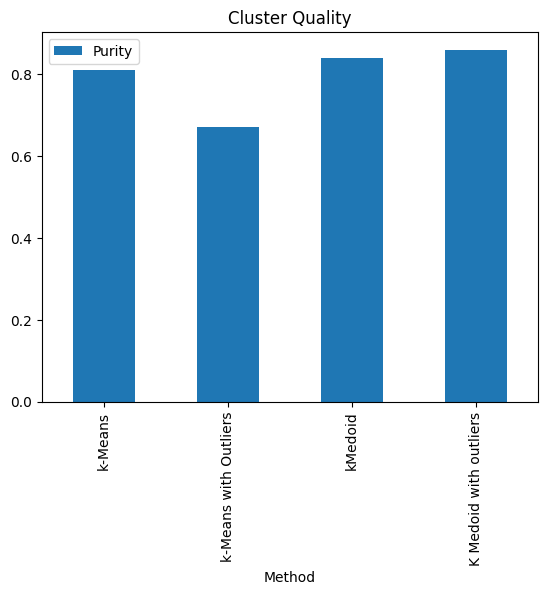

In [ ]:
data = [['k-Means', 0.81], ['k-Means with Outliers', 0.67], ['kMedoid', 0.84],['K Medoid with outliers', 0.86]]
df = pd.DataFrame(data, columns = ['Method', 'Purity'])
df.plot.bar(x='Method',y='Purity',title='Cluster Quality')